# Laporan Proyek Machine Learning - Muhammad Bagus Adi Prayoga

## Project Review

Industri anime mengalami pertumbuhan pesat dalam beberapa tahun terakhir, didorong oleh popularitas platform streaming dan konten yang berlimpah. Dengan banyaknya judul anime yang tersedia, penonton sering kali kesulitan menemukan konten baru yang sesuai dengan selera mereka [1]. Di sinilah sistem rekomendasi anime berperan, memberikan saran personal berdasarkan preferensi pengguna dan karakteristik konten.

Ada beberapa alasan mengapa sistem rekomendasi sangat penting bagi industri anime:
- **Menavigasi Konten yang Beragam**: Pertumbuhan anime yang eksponensial dapat membuat penonton kewalahan dan kesulitan menemukan konten yang sesuai dengan minat mereka. Sistem rekomendasi membantu pengguna menemukan konten yang relevan dengan minat mereka.
- **Meningkatkan Kepuasan Pengguna**: Rekomendasi yang dipersonalisasi membantu pengguna menemukan konten yang mereka sukai, meningkatkan kepuasan dan keterlibatan dengan platform.
- **Mempertahankan Pengguna**: Sistem rekomendasi membantu platform mempertahankan pengguna dengan terus menyediakan konten sesuai preferensi mereka, mengurangi kemungkinan berpindah ke platform lain.

Penelitian sebelumnya pada sistem rekomendasi anime telah mengeksplorasi berbagai pendekatan dan teknik untuk meningkatkan akurasi dan efektivitas rekomendasi. Beberapa bidang penelitian utama yang telah dipelajari meliputi:
- ***Collaborative Filtering***: Pendekatan ini melibatkan analisis perilaku pengguna yang serupa untuk memberikan rekomendasi. Pendekatan ini terbukti efektif dalam memberikan rekomendasi berdasarkan kesamaan minat di antara para pengguna [2].
- ***Content-Based Filtering***: Metode ini berfokus pada karakteristik konten itu sendiri, seperti genre, sutradara, atau pengisi suara, untuk memberikan rekomendasi. Metode ini memungkinkan rekomendasi yang dipersonalisasi berdasarkan preferensi spesifik pengguna [2].

Singkatnya, pertumbuhan industri anime dan banyaknya konten yang tersedia mengharuskan penggunaan sistem rekomendasi untuk membantu penonton menemukan dan menikmati konten yang sesuai dengan preferensi mereka. Penelitian yang ada telah mengeksplorasi berbagai pendekatan dan teknik untuk meningkatkan efektivitas sistem ini, dengan fokus pada *collaborative filtering* dan *content-based filtering*.

## Business Understanding

### Problem Statements

Berdasarkan pemahaman atas *project overview* yang telah diuraikan sebelumnya, berikut adalah *problem statements* yang teridentifikasi:
1. Bagaimana membangun sistem rekomendasi anime yang efektif untuk membantu pengguna menemukan konten yang sesuai dengan informasi anime yang tersedia?
2. Bagaimana membangun sistem rekomendasi anime yang dapat memberikan rekomendasi berdasarkan kesamaan minat di antara pengguna?

### Goals

Berdasarkan *problem statements* yang telah diidentifikasi sebelumnya, berikut adalah beberapa *goals* dari proyek ini:
1. Mengembangkan sistem rekomendasi anime berdasarkan kesamaan informasi anime yang tersedia.
2. Mengembangkan sistem rekomendasi anime berdasarkan kesamaan penilaian anime yang diberikan oleh pengguna.

### Solution statements

Berdasarkan *goals* di atas, maka diperoleh beberapa *solution statement* untuk menyelesaikan masalah tersebut, yaitu:
1. Membuat sistem rekomendasi dengan teknik *Content-Based Filtering* berdasarkan informasi anime.
2. Membuat sistem rekomendasi dengan teknik *Collaborative Filtering* berdasarkan penilaian anime yang diberikan oleh pengguna.

## Data Understanding

### Colab Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip -q install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download CooperUnion/anime-recommendations-database
! unzip anime-recommendations-database.zip

 36% 9.00M/25.0M [00:00<00:00, 35.0MB/s]
100% 25.0M/25.0M [00:00<00:00, 79.1MB/s]
Archive:  anime-recommendations-database.zip
  inflating: anime.csv               
  inflating: rating.csv              


### Initial Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import anime data
anime = pd.read_csv("anime.csv", engine="pyarrow")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
# import user rating data
rating = pd.read_csv("rating.csv", engine="pyarrow")
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


### Datasets Description

#### Anime Data

In [6]:
# anime data columns info
anime.info(), anime.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


(None, (12294, 7))

In [7]:
# anime data descriptive statistics
anime.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [8]:
# anime data descriptive statistics for object columns
anime.describe(include=object).T

,count,unique,top,freq
name,12294,12292,Shi Wan Ge Leng Xiaohua,2
genre,12294,3265,Hentai,823
type,12294,7,TV,3787
episodes,12294,187,1,5677


In [9]:
# anime data missing values
anime.isna().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64

In [10]:
# drop missing values
anime.dropna(axis=0, inplace=True)
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [11]:
# check duplicate value
anime[anime.duplicated()].shape

(0, 7)

**Insight:**
- Tabel `anime.csv` terdiri dari 12,294 baris dan 6 kolom
- Pada kolom *episodes* terdapat indikasi ada nilai yang bukan bilangan bulat
- Terdapat *missing value* pada kolom rating, sehingga perlu dilakukan *missing value handling*
    - Dalam hal ini langsung dilakukan penghapusan data, karena data yang memiliki nilai tersebut sangat sedikit
- Tidak ada data duplikat pada tabel ini

#### Rating Data

In [12]:
# rating data columns info
rating.info(), rating.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


(None, (7813737, 3))

In [13]:
# rating data descriptive statistics
rating.describe().T.to_markdown()

'|          |       count |        mean |        std |   min |   25% |   50% |   75% |   max |\n|:---------|------------:|------------:|-----------:|------:|------:|------:|------:|------:|\n| user_id  | 7.81374e+06 | 36728       | 20997.9    |     1 | 18974 | 36791 | 54757 | 73516 |\n| anime_id | 7.81374e+06 |  8909.07    |  8883.95   |     1 |  1240 |  6213 | 14093 | 34519 |\n| rating   | 7.81374e+06 |     6.14403 |     3.7278 |    -1 |     6 |     7 |     9 |    10 |'

In [14]:
# rating data missing values
rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [15]:
# rating data duplicate
rating[rating.duplicated(["user_id", "anime_id"])].shape

(7, 3)

In [16]:
# drop rating duplicated data
rating = rating.drop_duplicates(["user_id", "anime_id"])
rating[rating.duplicated(["user_id", "anime_id"])].shape

(0, 3)

**Insight:**
- Tabel `rating.csv` terdiri dari 7,813,737 baris dan 3 kolom
- Tidak ada *missing value* pada tabel ini
- Terdapat data duplikat pada tabel ini, sehingga perlu dihapus

### Exploratory Data Analysis

In [17]:
# merge kedua tabel
anime_rating = pd.merge(anime, rating, on="anime_id", suffixes=(None, "_user"))
anime_rating = anime_rating.rename(columns={"name": "anime_name", "rating_user": "user_rating"})
anime_rating.head()

,anime_id,anime_name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


#### Rating Distribution

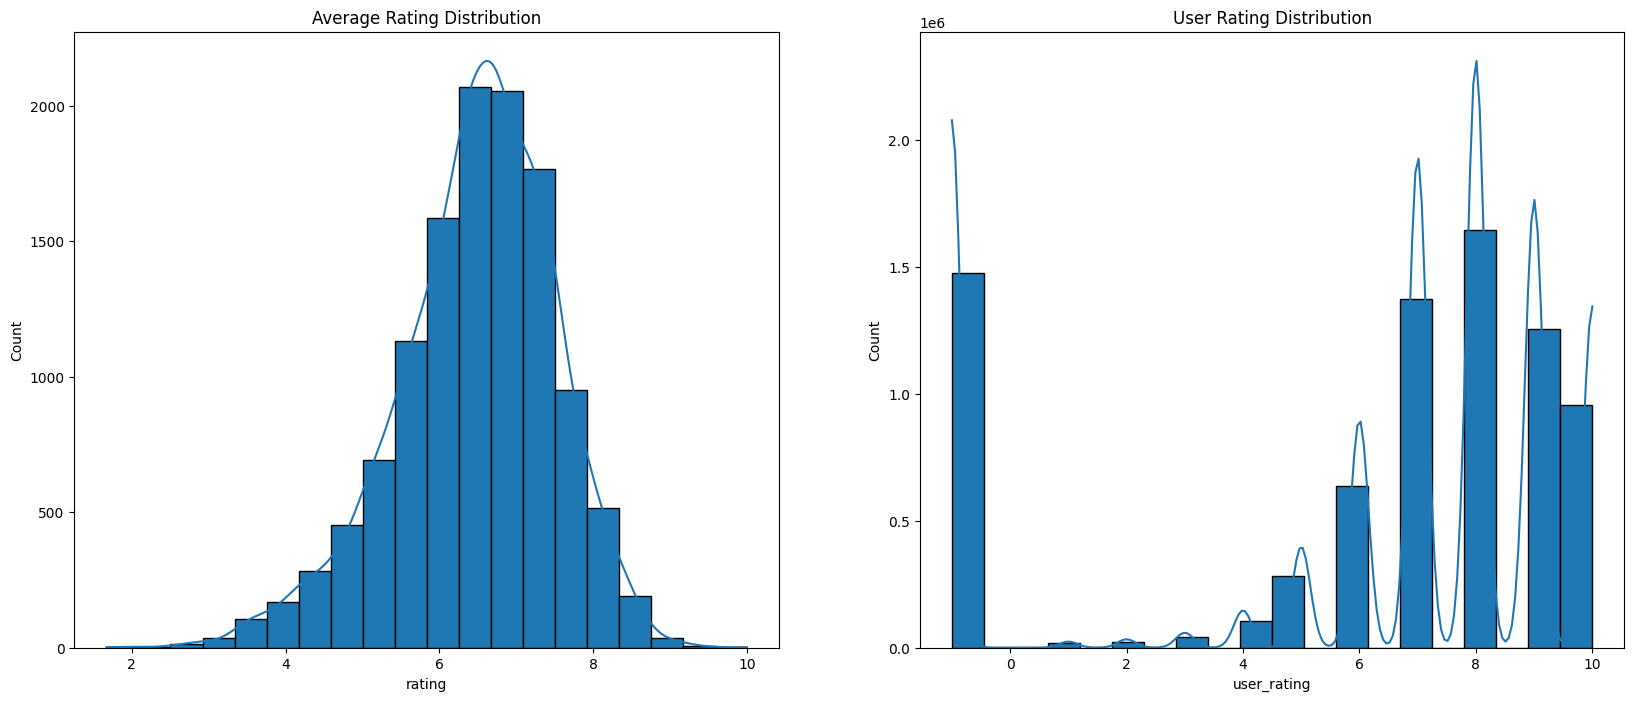

In [18]:
# average rating (web rating) and user rating distribution
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.histplot(anime["rating"], kde=True, bins=20, alpha=1, fill=True)
plt.title("Average Rating Distribution")
plt.subplot(1, 2, 2)
sns.histplot(anime_rating["user_rating"], kde=True, bins=20, alpha=1, fill=True)
plt.title("User Rating Distribution")
plt.show()

**Insight**:
- Terdapat outlier pada user rating, dimana ada data rating yang bernilai -1, sehinnga perlu dilakukan cleaning pada data user rating.
- Data rata-rata rating terdistribusi normal

#### Top Anime Members

In [19]:
df_temp = anime_rating.copy()
df_temp.drop_duplicates(subset=["anime_name"], inplace=True, keep="first")
top_anime_member = (
    df_temp.groupby("anime_name")
    ["members"].sum()
    .sort_values(ascending=False)
    .head(10)
)
top_anime_member

anime_name
Death Note                          1013917
Shingeki no Kyojin                   896229
Sword Art Online                     893100
Fullmetal Alchemist: Brotherhood     793665
Angel Beats!                         717796
Code Geass: Hangyaku no Lelouch      715151
Naruto                               683297
Steins;Gate                          673572
Mirai Nikki (TV)                     657190
Toradora!                            633817
Name: members, dtype: int64

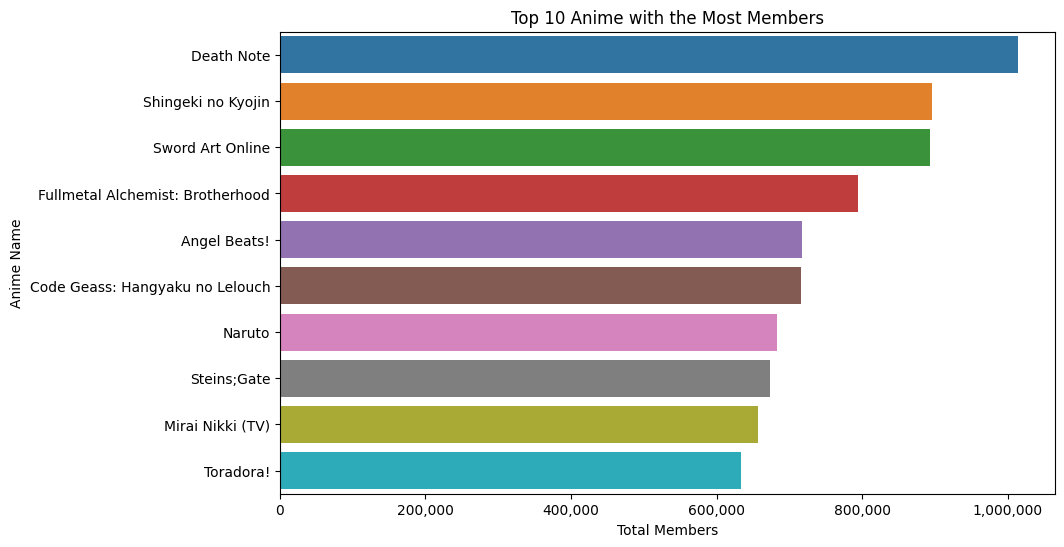

In [20]:
# top 10 anime with the most members
plt.figure(figsize=(10, 6))
sns.barplot(y=top_anime_member.index, x=top_anime_member.values, hue=top_anime_member.index, dodge=False)
plt.title("Top 10 Anime with the Most Members")
plt.xlabel("Total Members")
plt.ylabel("Anime Name")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

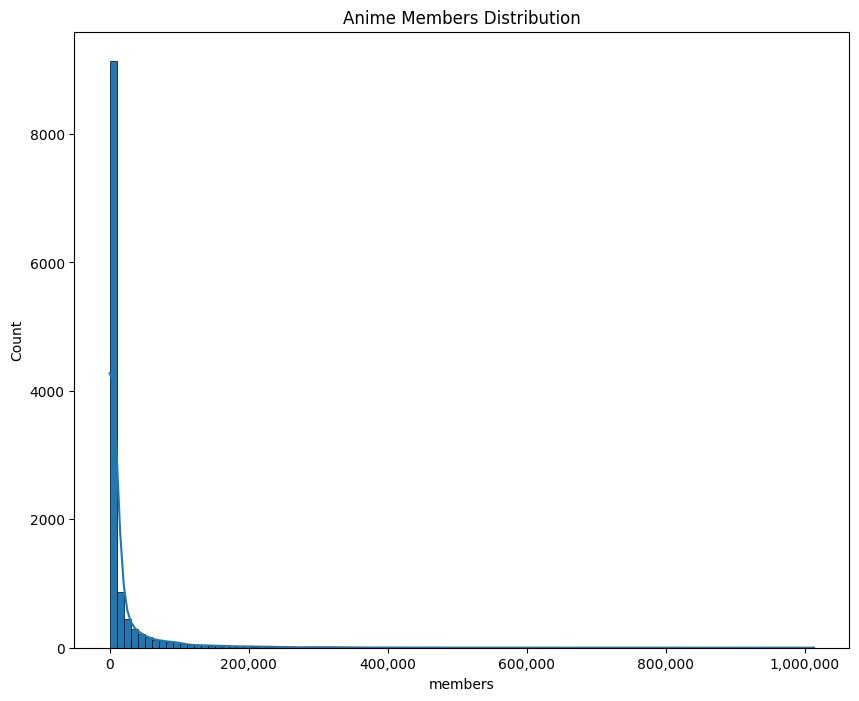

In [21]:
# plot anime members
plt.figure(figsize=(10, 8))
sns.histplot(anime["members"], kde=True, bins=100, alpha=1, fill=True)
plt.title("Anime Members Distribution")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

#### Top Anime Users Ratings

In [22]:
# top 10 anime with the highest sum of user rating
top_anime_user_rating = (
    anime_rating.groupby("anime_name")
    ["user_rating"].sum()
    .sort_values(ascending=False)
    .head(10)
)
top_anime_user_rating

anime_name
Death Note                            297260
Shingeki no Kyojin                    216372
Code Geass: Hangyaku no Lelouch       211794
Sword Art Online                      209891
Angel Beats!                          197856
Fullmetal Alchemist: Brotherhood      197303
Code Geass: Hangyaku no Lelouch R2    188262
Elfen Lied                            185762
Fullmetal Alchemist                   176627
Toradora!                             175686
Name: user_rating, dtype: int64

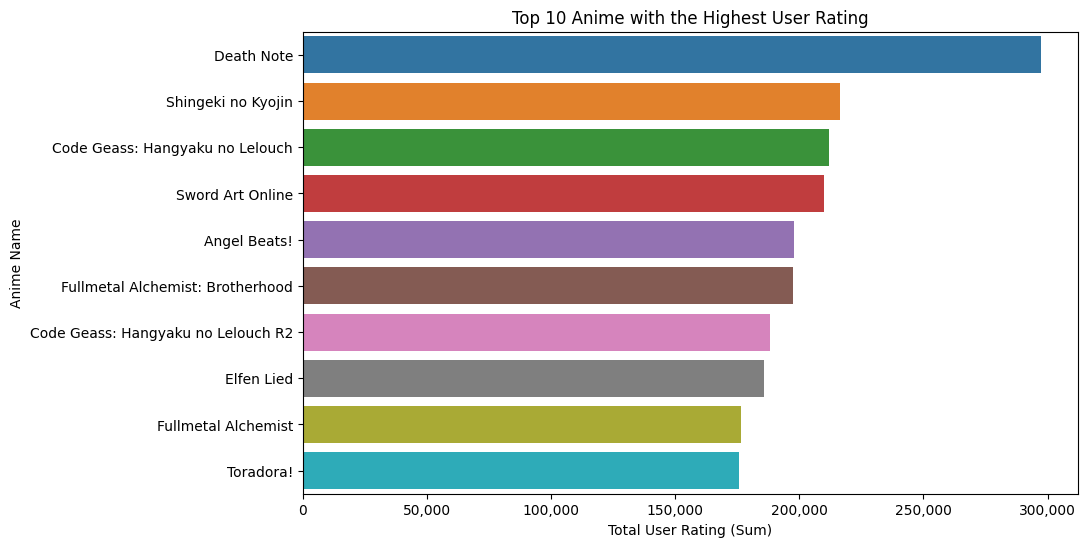

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_anime_user_rating.index, x=top_anime_user_rating.values, hue=top_anime_user_rating.index, dodge=False)
plt.title("Top 10 Anime with the Highest User Rating")
plt.xlabel("Total User Rating (Sum)")
plt.ylabel("Anime Name")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

#### Anime Categories

In [24]:
top_anime_category = (
    df_temp.groupby("type")
    ["anime_name"].count()
    .sort_values(ascending=False)
)
top_anime_category

type
TV         3402
OVA        3090
Movie      2139
Special    1582
ONA         529
Music       451
Name: anime_name, dtype: int64

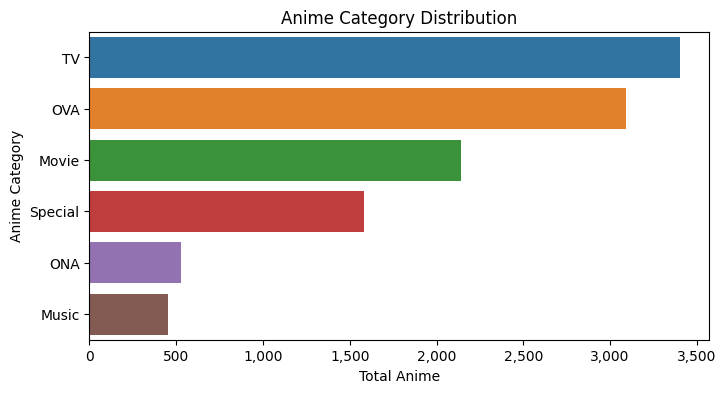

In [25]:
# plot anime category distribution
plt.figure(figsize=(8, 4))
sns.barplot(y=top_anime_category.index, x=top_anime_category.values, hue=top_anime_category.index, dodge=False)
plt.title("Anime Category Distribution")
plt.xlabel("Total Anime")
plt.ylabel("Anime Category")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

#### Anime Genres

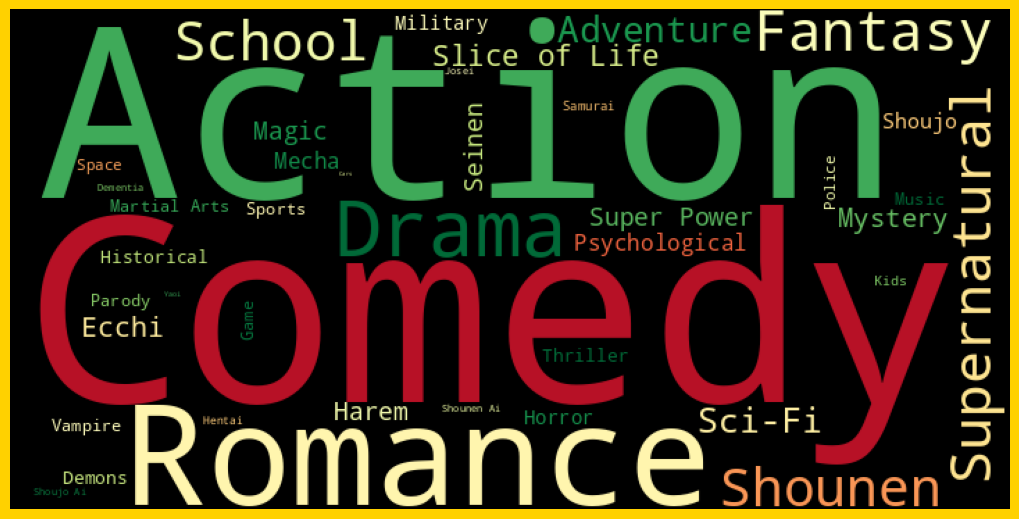

In [26]:
from collections import defaultdict
from wordcloud import WordCloud

all_genres = defaultdict(int)

for genres in anime_rating["genre"]:
    for genre in genres.split(","):
        all_genres[genre.strip()] += 1

wordcloud = WordCloud(
    width=720,
    height=360,
    background_color="black",
    colormap="RdYlGn",
).generate_from_frequencies(all_genres)

plt.figure(figsize=(10, 8), facecolor="#ffd100")
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad=0)
plt.show()

#### Anime Episodes

In [27]:
# anime episodes value unique
anime["episodes"].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

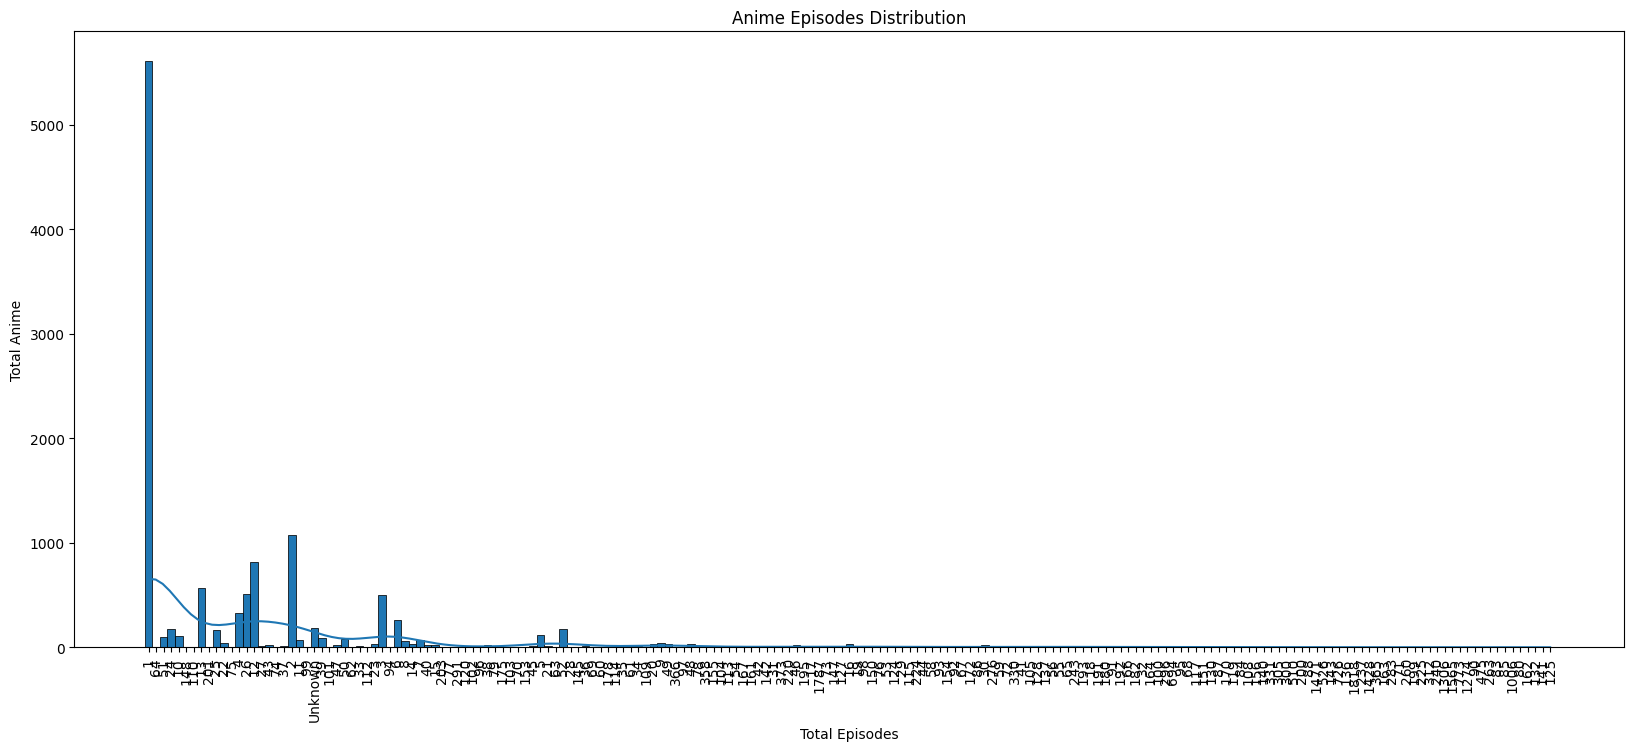

In [28]:
# plot anime episodes distribution
plt.figure(figsize=(20, 8))
sns.histplot(anime["episodes"], kde=True, bins=20, alpha=1, fill=True)
plt.title("Anime Episodes Distribution")
plt.xlabel("Total Episodes")
plt.ylabel("Total Anime")
plt.xticks(rotation=90)
plt.show()

**Insight**:
- Terdapat nilai `Unknown` pada jumlah episode anime, sehingga perlu dilakukan dilakukan handling data.

### Clear Variable

In [29]:
%reset -f

## Data Preparation

### Content Based Filtering

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import anime data
df_anime = pd.read_csv("anime.csv")
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [31]:
# drop missing values
df_anime.dropna(axis=0, inplace=True)
df_anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

#### Episodes Column Handling

In [32]:
# remove unknown values on episodes column
df_anime = df_anime[df_anime["episodes"] != "Unknown"]
df_anime["episodes"] = df_anime["episodes"].astype(int)
df_anime["episodes"].unique()

<ipython-input-32-ecf119cdfae8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anime["episodes"] = df_anime["episodes"].astype(int)


array([   1,   64,   51,   24,   10,  148,  110,   13,  201,   25,   22,
         75,    4,   26,   12,   27,   43,   74,   37,    2,   11,   99,
         39,  101,   47,   50,   62,   33,  112,   23,    3,   94,    6,
          8,   14,    7,   40,   15,  203,   77,  291,  120,  102,   96,
         38,   79,  175,  103,   70,  153,   45,    5,   21,   63,   52,
         28,  145,   36,   69,   60,  178,  114,   35,   61,   34,  109,
         20,    9,   49,  366,   97,   48,   78,  358,  155,  104,  113,
         54,  167,  161,   42,  142,   31,  373,  220,   46,  195,   17,
       1787,   73,  147,  127,   16,   19,   98,  150,   76,   53,  124,
         29,  115,  224,   44,   58,   93,  154,   92,   67,  172,   86,
         30,  276,   59,   72,  330,   41,  105,  128,  137,   56,   55,
         65,  243,  193,   18,  191,  180,   91,  192,   66,  182,   32,
        164,  100,  296,  694,   95,   68,  117,  151,  130,   87,  170,
        119,   84,  108,  156,  140,  331,  305,  3

#### Genre and Type Column Handling

In [33]:
# Preprocess the genre data
## remove the leading and trailing whitespaces
df_anime["genre"] = df_anime["genre"].str.strip()
## replace the comma with space
df_anime["genre"] = df_anime["genre"].str.replace(",", " ")
## lower case the genre
df_anime["genre"] = df_anime["genre"].str.lower()

# Preprocess the type data
## lower case the type
df_anime["type"] = df_anime["type"].str.lower()

df_anime.head()

<ipython-input-33-788f6133e3ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anime["genre"] = df_anime["genre"].str.strip()
<ipython-input-33-788f6133e3ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anime["genre"] = df_anime["genre"].str.replace(",", " ")
<ipython-input-33-788f6133e3ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,drama romance school supernatural,movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,action adventure drama fantasy magic mili...,tv,64,9.26,793665
2,28977,Gintama°,action comedy historical parody samurai s...,tv,51,9.25,114262
3,9253,Steins;Gate,sci-fi thriller,tv,24,9.17,673572
4,9969,Gintama&#039;,action comedy historical parody samurai s...,tv,51,9.16,151266


#### Encode Episodes, Rating, and Members

In [34]:
df_anime.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,11830.0,13404.150211,11110.087616,1.00,3326.2500,9820.50,23302.50,34519.0
episodes,11830.0,12.486729,47.097131,1.00,1.0000,2.00,12.00,1818.0
rating,11830.0,6.484609,1.019147,1.67,5.8925,6.57,7.19,10.0
members,11830.0,18511.002790,55371.439012,12.00,232.2500,1589.50,9832.00,1013917.0


In [35]:
def encode_episodes(num_episodes):
    if num_episodes == 1:
        return "oneepisode"
    elif num_episodes < 14:
        return "shortepisode"
    elif num_episodes < 27:
        return "mediumepisode"
    elif num_episodes < 65:
        return "longepisode"
    elif num_episodes < 131:
        return "verylongepisode"
    elif num_episodes < 208:
        return "epicepisode"
    elif num_episodes < 500:
        return "legendaryepisode"
    else:
        return "neverendingepisode"

def encode_rating(rating):
    if rating < 2:
        return "verybad"
    elif rating < 4:
        return "bad"
    elif rating < 6:
        return "average"
    elif rating < 7:
        return "good"
    elif rating < 8:
        return "verygood"
    elif rating < 9:
        return "great"
    else:
        return "masterpiece"

def encode_popularity(member_count):
    if member_count < 50000:
        return "unpopular"
    elif member_count < 100000:
        return "lesspopular"
    elif member_count < 200000:
        return "popular"
    elif member_count < 400000:
        return "verypopular"
    elif member_count < 800000:
        return "famous"
    else:
        return "legendary"

In [36]:
# apply the encode function
df_anime["episodes_category"] = df_anime["episodes"].apply(encode_episodes)
df_anime["rating_category"] = df_anime["rating"].apply(encode_rating)
df_anime["popularity_category"] = df_anime["members"].apply(encode_popularity)
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members,episodes_category,rating_category,popularity_category
0,32281,Kimi no Na wa.,drama romance school supernatural,movie,1,9.37,200630,oneepisode,masterpiece,verypopular
1,5114,Fullmetal Alchemist: Brotherhood,action adventure drama fantasy magic mili...,tv,64,9.26,793665,longepisode,masterpiece,famous
2,28977,Gintama°,action comedy historical parody samurai s...,tv,51,9.25,114262,longepisode,masterpiece,popular
3,9253,Steins;Gate,sci-fi thriller,tv,24,9.17,673572,mediumepisode,masterpiece,famous
4,9969,Gintama&#039;,action comedy historical parody samurai s...,tv,51,9.16,151266,longepisode,masterpiece,popular


#### Make Features for Content Based Filtering

In [37]:
# combine the features based on the genre, type, episodes, rating, and popularity
df_anime["features"] = (
    df_anime["genre"]
    + " "
    + df_anime["type"]
    + " "
    + df_anime["episodes_category"]
    + " "
    + df_anime["rating_category"]
    + " "
    + df_anime["popularity_category"]
)
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members,episodes_category,rating_category,popularity_category,features
0,32281,Kimi no Na wa.,drama romance school supernatural,movie,1,9.37,200630,oneepisode,masterpiece,verypopular,drama romance school supernatural movie one...
1,5114,Fullmetal Alchemist: Brotherhood,action adventure drama fantasy magic mili...,tv,64,9.26,793665,longepisode,masterpiece,famous,action adventure drama fantasy magic mili...
2,28977,Gintama°,action comedy historical parody samurai s...,tv,51,9.25,114262,longepisode,masterpiece,popular,action comedy historical parody samurai s...
3,9253,Steins;Gate,sci-fi thriller,tv,24,9.17,673572,mediumepisode,masterpiece,famous,sci-fi thriller tv mediumepisode masterpiece ...
4,9969,Gintama&#039;,action comedy historical parody samurai s...,tv,51,9.16,151266,longepisode,masterpiece,popular,action comedy historical parody samurai s...


In [38]:
# reset index after preprocessing
df_anime.reset_index(inplace=True)

### Collaborative Filtering

In [39]:
df_rating = pd.read_csv("rating.csv")
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [40]:
df_rating.shape

(7813737, 3)

In [41]:
# check rating with value -1
print(df_rating[df_rating["rating"] == -1].shape)

# check percentage of rating with value -1
print(df_rating[df_rating["rating"] == -1].shape[0] / df_rating.shape[0] * 100)

(1476496, 3)
18.896156858107716


In [42]:
# drop rating with value -1
df_rating = df_rating[df_rating["rating"] != -1]
df_rating.shape

(6337241, 3)

In [43]:
# check duplicate rating
print(df_rating[df_rating.duplicated()].shape)

(1, 3)


In [44]:
# drop duplicate rating
df_rating = df_rating.drop_duplicates(["user_id", "anime_id"])
df_rating.shape

(6337234, 3)

In [45]:
# check missing values
df_rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [46]:
df_rating['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2621
         ... 
66747       1
35463       1
55557       1
55563       1
22208       1
Name: user_id, Length: 69600, dtype: int64

In [47]:
# limit dataset (limited memory used)
counts = df_rating['user_id'].value_counts()
df_rating = df_rating[df_rating['user_id'].isin(counts[counts >= 500].index)]

In [48]:
print(df_rating.shape)
df_rating.head()

(1005314, 3)


,user_id,anime_id,rating
17304,226,1,8
17305,226,6,8
17306,226,20,7
17307,226,25,6
17308,226,27,7


In [49]:
df_anime_rating = pd.merge(df_anime, df_rating, on="anime_id", suffixes=(None, "_user"))
df_anime_rating = df_anime_rating.rename(columns={"name": "anime_name", "rating_user": "user_rating"})
df_anime_rating.head()

,index,anime_id,anime_name,genre,type,episodes,rating,members,episodes_category,rating_category,popularity_category,features,user_id,user_rating
0,0,32281,Kimi no Na wa.,drama romance school supernatural,movie,1,9.37,200630,oneepisode,masterpiece,verypopular,drama romance school supernatural movie one...,271,10
1,0,32281,Kimi no Na wa.,drama romance school supernatural,movie,1,9.37,200630,oneepisode,masterpiece,verypopular,drama romance school supernatural movie one...,786,10
2,0,32281,Kimi no Na wa.,drama romance school supernatural,movie,1,9.37,200630,oneepisode,masterpiece,verypopular,drama romance school supernatural movie one...,1497,10
3,0,32281,Kimi no Na wa.,drama romance school supernatural,movie,1,9.37,200630,oneepisode,masterpiece,verypopular,drama romance school supernatural movie one...,1504,10
4,0,32281,Kimi no Na wa.,drama romance school supernatural,movie,1,9.37,200630,oneepisode,masterpiece,verypopular,drama romance school supernatural movie one...,1522,8


In [50]:
anime_pivot = df_anime_rating.pivot_table(index='anime_name',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,226,271,294,392,446,478,661,741,771,786,...,73234,73272,73286,73340,73356,73362,73378,73395,73499,73502
anime_name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,7.0,0.0,0.0,9.0,0.0,6.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,8.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,8.0,4.0,9.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,9.0,9.0,0.0,8.0,0.0,9.0,0.0,10.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling and Result

### Content Based Filtering

#### Cosine Similarity

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Create TF-IDF matrix based on features
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df_anime["features"])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [52]:
# check the shape of the matrix
tfidf_matrix.shape, cosine_sim.shape, tfidf.get_feature_names_out()

((11830, 73),
 (11830, 11830),
 array(['action', 'adventure', 'ai', 'arts', 'average', 'bad', 'cars',
        'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'epicepisode',
        'famous', 'fantasy', 'fi', 'game', 'good', 'great', 'harem',
        'hentai', 'historical', 'horror', 'josei', 'kids', 'legendary',
        'legendaryepisode', 'lesspopular', 'life', 'longepisode', 'magic',
        'martial', 'masterpiece', 'mecha', 'mediumepisode', 'military',
        'movie', 'music', 'mystery', 'neverendingepisode', 'of', 'ona',
        'oneepisode', 'ova', 'parody', 'police', 'popular', 'power',
        'psychological', 'romance', 'samurai', 'school', 'sci', 'seinen',
        'shortepisode', 'shoujo', 'shounen', 'slice', 'space', 'special',
        'sports', 'super', 'supernatural', 'thriller', 'tv', 'unpopular',
        'vampire', 'verybad', 'verygood', 'verylongepisode', 'verypopular',
        'yaoi', 'yuri'], dtype=object))

#### Helper Function for Content Based Filtering

In [53]:
def find_anime(title, anime_data):
    try:
        # Search for anime with the given title
        bool_series = anime_data["name"].str.contains(title, case=False, na=False)
        # Filter the dataframe based on the search result
        found_anime = anime_data[bool_series]
        return found_anime
    except:
        return "Anime not found or an error occurred."


def get_cbf_recommendations(title, cosine_sim=cosine_sim, anime_data=df_anime, n_anime=5):
    try:
        # Get the index of the anime title
        idx = anime_data.loc[anime_data["name"] == title].index[0]

        # Get the pairwise similarity scores
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the anime titles based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the top N most similar anime titles (excluding the input title itself)
        top_anime_indices = [i[0] for i in sim_scores[1:n_anime+1]]
        top_anime_titles = anime_data[
            [
                "name",
                "genre",
                "type",
                "episodes_category",
                "rating_category",
                "popularity_category",
            ]
        ].iloc[top_anime_indices]

        # Add similarity score to the dataframe
        top_anime_titles["similarity_score"] = [i[1] for i in sim_scores[1:n_anime+1]]
        return top_anime_titles
    except:
        return "Anime not found or an error occurred."

#### Content Based Filtering Result

In [54]:
# String to be searched in start of string
search = "Log Horizon"

# Search anime in the dataframe
found_anime = find_anime(search, df_anime)
found_anime

,index,anime_id,name,genre,type,episodes,rating,members,episodes_category,rating_category,popularity_category,features
372,374,17265,Log Horizon,action adventure fantasy game magic shounen,tv,25,8.14,387100,mediumepisode,great,verypopular,action adventure fantasy game magic shoun...
1137,1142,23321,Log Horizon 2nd Season,action adventure fantasy game magic shounen,tv,25,7.66,215817,mediumepisode,verygood,verypopular,action adventure fantasy game magic shoun...
3809,3833,21235,Log Horizon Recap,action adventure fantasy magic shounen,special,1,6.87,10245,oneepisode,good,unpopular,action adventure fantasy magic shounen spe...


In [57]:
input_anime_title = "Log Horizon"

print("Recommendations for", input_anime_title + ":")
input_anime_info = df_anime[
    [
        "name",
        "genre",
        "type",
        "episodes_category",
        "rating_category",
        "popularity_category",
    ]
].loc[df_anime["name"] == input_anime_title]
print(input_anime_info.to_string(index=False))
print()

recommendations = get_cbf_recommendations(input_anime_title, cosine_sim, df_anime, 10)
recommendations

Recommendations for Log Horizon:
       name                                            genre type episodes_category rating_category popularity_category
Log Horizon action  adventure  fantasy  game  magic  shounen   tv     mediumepisode           great         verypopular



,name,genre,type,episodes_category,rating_category,popularity_category,similarity_score
1137,Log Horizon 2nd Season,action adventure fantasy game magic shounen,tv,mediumepisode,verygood,verypopular,0.916156
100,Magi: The Kingdom of Magic,action adventure fantasy magic shounen,tv,mediumepisode,great,verypopular,0.888521
266,Magi: The Labyrinth of Magic,action adventure fantasy magic shounen,tv,mediumepisode,great,verypopular,0.888521
479,Overlord,action adventure fantasy game magic super...,tv,shortepisode,great,verypopular,0.858398
126,Fate/stay night: Unlimited Blade Works 2nd Season,action fantasy magic shounen supernatural,tv,shortepisode,great,verypopular,0.736562
137,Fate/stay night: Unlimited Blade Works,action fantasy magic shounen supernatural,tv,shortepisode,great,verypopular,0.736562
253,Fairy Tail (2014),action adventure comedy fantasy magic sho...,tv,verylongepisode,great,verypopular,0.723540
140,Nanatsu no Taizai,action adventure ecchi fantasy shounen su...,tv,mediumepisode,great,verypopular,0.720421
1559,Kaze no Stigma,action fantasy magic romance shounen,tv,mediumepisode,verygood,verypopular,0.719271
340,Zetsuen no Tempest,action drama fantasy magic mystery psycho...,tv,mediumepisode,great,verypopular,0.695577


### Collaborative Filtering

In [58]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

anime_matrix = csr_matrix(anime_pivot.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [59]:
def find_anime_index(title, anime_pivot):
    return anime_pivot.index.get_loc(title)

def get_cf_recommendations(query_index, anime_pivot=anime_pivot, model_knn=model_knn, anime_data=df_anime, n_anime=5):
    distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = n_anime+1)
    recommendations = []
    for i in range(1, len(distances.flatten())):
        anime_name = anime_pivot.index[indices.flatten()[i]]
        anime_info = anime_data[anime_data['name'] == anime_name].iloc[0]
        recommendations.append({
            'name': anime_info['name'],
            'genre': anime_info['genre'],
            'type': anime_info['type'],
            'episodes_category': anime_info['episodes_category'],
            'rating_category': anime_info['rating_category'],
            'popularity_category': anime_info['popularity_category'],
            'similarity_distance': distances.flatten()[i]
        })
    return pd.DataFrame(recommendations)

In [62]:
anime_name = "Log Horizon"
query_index = find_anime_index(anime_name, anime_pivot)
recommendations_df = get_cf_recommendations(query_index, anime_pivot, model_knn, df_anime, 10)

print("Recommendations for", anime_name + ":")
input_anime_info = df_anime[
    [
        "name",
        "genre",
        "type",
        "episodes_category",
        "rating_category",
        "popularity_category",
    ]
].loc[df_anime["name"] == input_anime_title]
print(input_anime_info.to_string(index=False))
print()

recommendations_df

Recommendations for Log Horizon:
       name                                            genre type episodes_category rating_category popularity_category
Log Horizon action  adventure  fantasy  game  magic  shounen   tv     mediumepisode           great         verypopular



,name,genre,type,episodes_category,rating_category,popularity_category,similarity_distance
0,Log Horizon 2nd Season,action adventure fantasy game magic shounen,tv,mediumepisode,verygood,verypopular,0.131326
1,No Game No Life,adventure comedy ecchi fantasy game super...,tv,shortepisode,great,famous,0.152395
2,Sword Art Online,action adventure fantasy game romance,tv,mediumepisode,verygood,legendary,0.179793
3,Hataraku Maou-sama!,comedy demons fantasy romance shounen,tv,shortepisode,great,famous,0.191013
4,Noragami,action adventure shounen supernatural,tv,shortepisode,great,famous,0.203997
5,Sword Art Online II,action adventure fantasy game romance,tv,mediumepisode,verygood,famous,0.211317
6,Shingeki no Kyojin,action drama fantasy shounen super power,tv,mediumepisode,great,legendary,0.211437
7,Yahari Ore no Seishun Love Comedy wa Machigatt...,comedy drama romance school,tv,shortepisode,great,verypopular,0.212268
8,Black Bullet,action mystery sci-fi seinen,tv,shortepisode,verygood,verypopular,0.212711
9,Mahouka Koukou no Rettousei,magic romance school sci-fi supernatural,tv,mediumepisode,verygood,verypopular,0.214613


## Evaluation

In [63]:
def evaluate_precision(relevant_items):
    """
    Evaluasi precision berdasarkan relevansi item yang direkomendasikan.

    Parameters:
    relevant_items (list): Daftar nilai relevansi item yang direkomendasikan.
                           1: relevan, 0: tidak relevan.

    Returns:
    float: Precision dari rekomendasi.
    """
    total_relevant = sum(relevant_items)
    total_recommended = len(relevant_items)
    precision = total_relevant / total_recommended if total_recommended > 0 else 0
    return precision

# Contoh penggunaan
relevant_items = [1, 0, 1, 1, 0]  # Contoh penilaian relevansi item yang direkomendasikan
precision = evaluate_precision(relevant_items)
print("Precision:", precision)


Precision: 0.6


In [75]:
import numpy as np

def calculate_dcg(scores, k):
    dcg = 0
    for i in range(1, k+1):
        dcg += scores[i-1] / np.log2(i + 1)
    return dcg

def calculate_idcg(scores, k):
    scores_sorted = sorted(scores, reverse=True)
    idcg = calculate_dcg(scores_sorted, k)
    return idcg

def calculate_ndcg(scores, k):
    dcg = calculate_dcg(scores, k)
    idcg = calculate_idcg(scores, k)
    if idcg == 0:
        return 0
    return dcg / idcg

# Contoh penggunaan
scores = [10, 8, 7, 9, 5]  # Skor subjektif relevansi item yang direkomendasikan
k = len(scores)  # Jumlah item yang dievaluasi (misalnya, panjang dari skor)
ndcg = calculate_ndcg(scores, k)
print("NDCG:", ndcg)


NDCG: 0.9890537778768422


### Content-Based Filtering

In [65]:
input_anime_title = "Log Horizon"

print("Recommendations for", input_anime_title + ":")
input_anime_info = df_anime[
    [
        "name",
        "genre",
        "type",
        "episodes_category",
        "rating_category",
        "popularity_category",
    ]
].loc[df_anime["name"] == input_anime_title]
print(input_anime_info.to_string(index=False))
print()

recommendations = get_cbf_recommendations(input_anime_title, cosine_sim, df_anime, 5)
recommendations

Recommendations for Log Horizon:
       name                                            genre type episodes_category rating_category popularity_category
Log Horizon action  adventure  fantasy  game  magic  shounen   tv     mediumepisode           great         verypopular



,name,genre,type,episodes_category,rating_category,popularity_category,similarity_score
1137,Log Horizon 2nd Season,action adventure fantasy game magic shounen,tv,mediumepisode,verygood,verypopular,0.916156
100,Magi: The Kingdom of Magic,action adventure fantasy magic shounen,tv,mediumepisode,great,verypopular,0.888521
266,Magi: The Labyrinth of Magic,action adventure fantasy magic shounen,tv,mediumepisode,great,verypopular,0.888521
479,Overlord,action adventure fantasy game magic super...,tv,shortepisode,great,verypopular,0.858398
126,Fate/stay night: Unlimited Blade Works 2nd Season,action fantasy magic shounen supernatural,tv,shortepisode,great,verypopular,0.736562


In [85]:
df_cbf_eval = recommendations[["name", "similarity_score"]].copy()

# memberikan relevansi pada item (1 or 0) untuk precision
df_cbf_eval["is_relevance"] = [1, 1, 1, 1, 0]

# memberikan score relevansi (1-5) untuk ndcg
df_cbf_eval["relevance_score"] = [5, 3, 3, 4, 1]

df_cbf_eval

,name,similarity_score,is_relevance,relevance_score
1137,Log Horizon 2nd Season,0.916156,1,5
100,Magi: The Kingdom of Magic,0.888521,1,3
266,Magi: The Labyrinth of Magic,0.888521,1,3
479,Overlord,0.858398,1,4
126,Fate/stay night: Unlimited Blade Works 2nd Season,0.736562,0,1


In [81]:
# menghitung precision
precision = evaluate_precision(df_cbf_eval["is_relevance"])
print("Precision:", precision)

# menghitung ndcg
ndcg = calculate_ndcg(df_cbf_eval["relevance_score"].values, len(df_cbf_eval["relevance_score"].values))
print("NDCG:", ndcg)

Precision: 0.8
NDCG: 0.9812892972257481


### Collaborative Filtering

In [78]:
anime_name = "Log Horizon"
query_index = find_anime_index(anime_name, anime_pivot)
recommendations_df = get_cf_recommendations(query_index, anime_pivot, model_knn, df_anime, 5)

print("Recommendations for", anime_name + ":")
input_anime_info = df_anime[
    [
        "name",
        "genre",
        "type",
        "episodes_category",
        "rating_category",
        "popularity_category",
    ]
].loc[df_anime["name"] == input_anime_title]
print(input_anime_info.to_string(index=False))
print()

recommendations_df

Recommendations for Log Horizon:
       name                                            genre type episodes_category rating_category popularity_category
Log Horizon action  adventure  fantasy  game  magic  shounen   tv     mediumepisode           great         verypopular



,name,genre,type,episodes_category,rating_category,popularity_category,similarity_distance
0,Log Horizon 2nd Season,action adventure fantasy game magic shounen,tv,mediumepisode,verygood,verypopular,0.131326
1,No Game No Life,adventure comedy ecchi fantasy game super...,tv,shortepisode,great,famous,0.152395
2,Sword Art Online,action adventure fantasy game romance,tv,mediumepisode,verygood,legendary,0.179793
3,Hataraku Maou-sama!,comedy demons fantasy romance shounen,tv,shortepisode,great,famous,0.191013
4,Noragami,action adventure shounen supernatural,tv,shortepisode,great,famous,0.203997


In [87]:
df_cf_eval = recommendations_df[["name", "similarity_distance"]].copy()

# memberikan relevansi pada item (1 or 0) untuk precision
df_cf_eval["is_relevance"] = [1, 1, 1, 0, 0]

# memberikan score relevansi (1-5) untuk ndcg
df_cf_eval["relevance_score"] = [5, 4, 4, 1, 2]

df_cf_eval

,name,similarity_distance,is_relevance,relevance_score
0,Log Horizon 2nd Season,0.131326,1,5
1,No Game No Life,0.152395,1,4
2,Sword Art Online,0.179793,1,4
3,Hataraku Maou-sama!,0.191013,0,1
4,Noragami,0.203997,0,2


In [83]:
# menghitung precision
precision = evaluate_precision(df_cf_eval["is_relevance"])
print("Precision:", precision)

# menghitung ndcg
ndcg = calculate_ndcg(df_cf_eval["relevance_score"].values, len(df_cf_eval["relevance_score"].values))
print("NDCG:", ndcg)

Precision: 0.6
NDCG: 0.9959316694933876
